In [1]:
import os
from PIL import Image
import pickle
import math
import matplotlib.pyplot as plt
import cv2

In [3]:
# load pickel models

model_dir = 'Trained_Models\\'

f = open(model_dir + 'Dog_R.pkl', "rb")
dog_R = pickle.load(f)
f.close()

f = open(model_dir + 'Dog_G.pkl', "rb")
dog_G = pickle.load(f)
f.close()

f = open(model_dir + 'Dog_B.pkl', "rb")
dog_B = pickle.load(f)
f.close()


f = open(model_dir + 'Background_R.pkl', "rb")
background_R = pickle.load(f)
f.close()

f = open(model_dir + 'Background_G.pkl', "rb")
background_G = pickle.load(f)
f.close()

f = open(model_dir + 'Background_B.pkl', "rb")
background_B = pickle.load(f)
f.close()

In [4]:
# test prediction
test_pixel = (153,70,100)

p_d = dog_R[test_pixel[0]] * dog_G[test_pixel[1]] * dog_B[test_pixel[2]]
p_b = background_R[test_pixel[0]] * background_G[test_pixel[1]] * background_B[test_pixel[2]]

prediction = math.log10((p_b/p_d))
print(prediction)


-0.02818739706889469


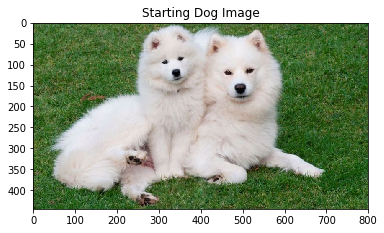

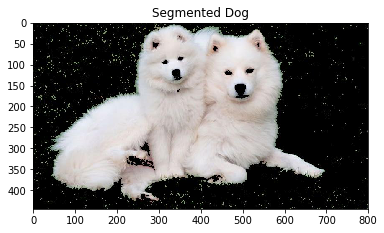

In [25]:
dog_image = Image.open("samoyed-and-puppy.jpg")
img_pixels = dog_image.load()

plt.imshow(dog_image)
plt.title("Starting Dog Image")
plt.show()

for i in range(0, dog_image.size[0]):
    for j in range(0, dog_image.size[1]):

        pixel_color = img_pixels[i,j]
#         print(pixel_color)
        p_d = dog_R[pixel_color[0]] * dog_G[pixel_color[1]] * dog_B[pixel_color[2]]
        p_b = background_R[pixel_color[0]] * background_G[pixel_color[1]] * background_B[pixel_color[2]]

        prediction = math.log10((p_b/p_d))
        
        if prediction > 0:
            img_pixels[i,j] = (0,0,0)
        else:
            pass
#             img_pixels[i,j] = (255,0,0)

dog_image.save('Segmented_image.jpg')
segmented = Image.open('Segmented_image.jpg')
plt.title("Segmented Dog")
plt.imshow(segmented)


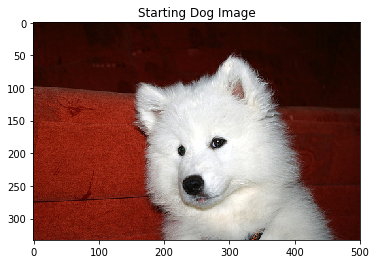

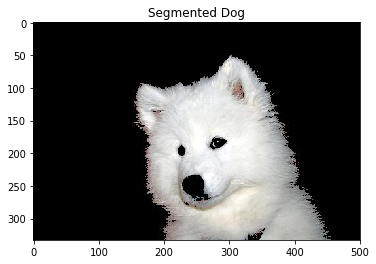

In [26]:
dog_image = Image.open("samoyed_53.jpg")
img_pixels = dog_image.load()

plt.imshow(dog_image)
plt.title("Starting Dog Image")
plt.show()

for i in range(0, dog_image.size[0]):
    for j in range(0, dog_image.size[1]):

        pixel_color = img_pixels[i,j]
#         print(pixel_color)
        p_d = dog_R[pixel_color[0]] * dog_G[pixel_color[1]] * dog_B[pixel_color[2]]
        p_b = background_R[pixel_color[0]] * background_G[pixel_color[1]] * background_B[pixel_color[2]]

        prediction = math.log10((p_b/p_d))
        
        if prediction > 0:
            img_pixels[i,j] = (0,0,0)
        else:
            pass
#             img_pixels[i,j] = (255,0,0)

dog_image.save('Segmented_image_2.jpg')
segmented = Image.open('Segmented_image_2.jpg')
plt.title("Segmented Dog")
plt.imshow(segmented)


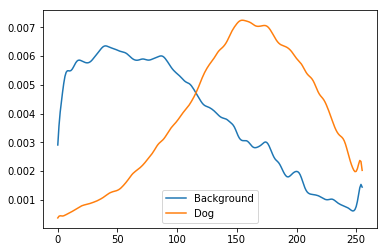

In [15]:
plt.plot(background_R.keys(), background_R.values(), label="Background")
plt.plot(dog_R.keys(), dog_R.values(), label="Dog")
plt.legend()
plt.show()

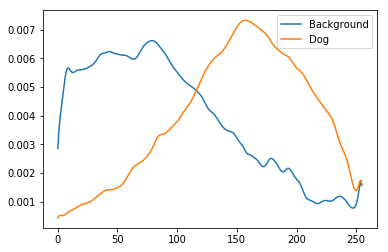

In [16]:
plt.plot(background_G.keys(), background_G.values(), label="Background")
plt.plot(dog_G.keys(), dog_G.values(), label="Dog")
plt.legend()
plt.show()

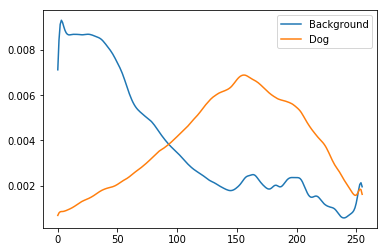

In [17]:
plt.plot(background_B.keys(), background_B.values(), label="Background")
plt.plot(dog_B.keys(), dog_B.values(), label="Dog")
plt.legend()
plt.show()